<a href="https://colab.research.google.com/github/mintesin/proj/blob/main/BANKNOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. PROJECT GOAL**

The aim of this project is to develop a model which can identify genuine and forgery bank notebooks.

**2. DATASET**

The dataset is from UCI Machine Learning Repository which are extracted from images of bank notebooks.



It has columns:
1. Variance_wavelet
2. Skewness wavelet
3. Curtosis wavelet
4. Entropy
5. Class 

 **3. PROJECT DEFINITION**

1. It is Supervised Classification Problem
2. Measure of Performance will be accuracy

**4. DATA READING AND INSIGHTS**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
data=pd.read_csv('banknote.txt',delimiter=',')

In [3]:
data.head()

,variance_Wavelet,skewness_Wavelet,curtosis_Wavelet,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
data.shape

(1372, 5)

In [5]:
list(data.columns)

['variance_Wavelet',
 'skewness_Wavelet',
 'curtosis_Wavelet',
 'entropy',
 'class']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variance_Wavelet  1372 non-null   float64
 1   skewness_Wavelet  1372 non-null   float64
 2   curtosis_Wavelet  1372 non-null   float64
 3   entropy           1372 non-null   float64
 4   class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


1. We have 1372 datapoints and 4 Variables with one target class.
2. We have no null points

In [7]:
data.describe()

,variance_Wavelet,skewness_Wavelet,curtosis_Wavelet,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<Figure size 360x360 with 0 Axes>

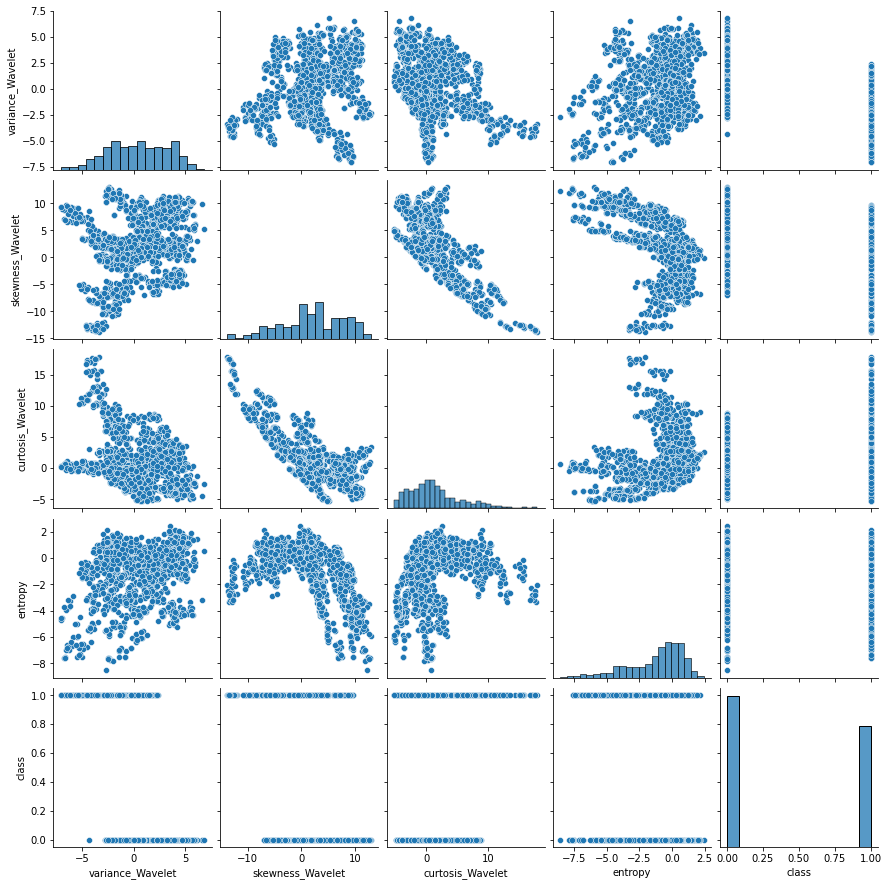

In [8]:
plt.figure(figsize=(5,5))
sns.pairplot(data)
plt.show()

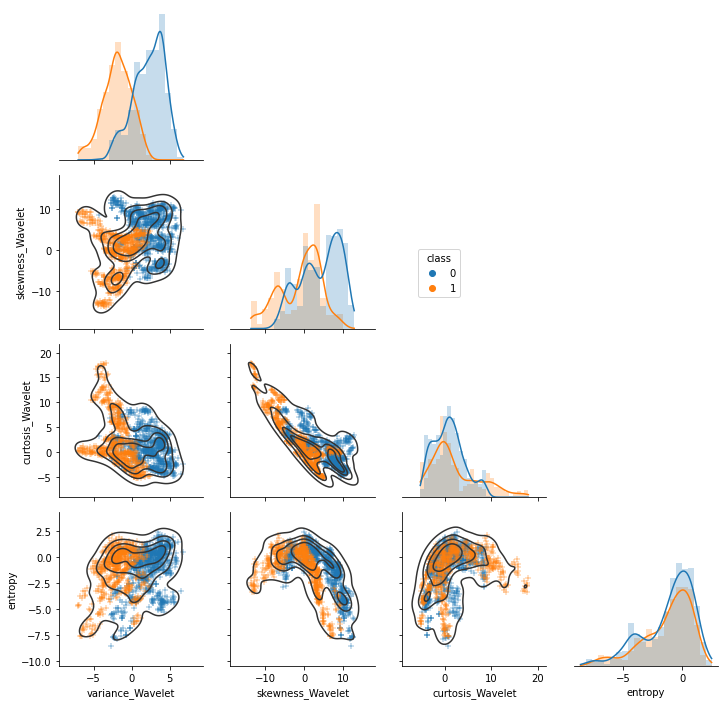

In [9]:
plot=sns.PairGrid(data,hue='class',corner=True)
plot.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
plot.map_lower(sns.scatterplot, marker="+")
plot.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
plot.add_legend(frameon=True)
plot.legend.set_bbox_to_anchor((.61, .6))

In [10]:
#THE NUMBER OF DUPLICATES IN OUR DATASET
data.duplicated().sum()

24

We have 24 duplicated datapoints

In [11]:
#Let us count the number of classes we have
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Our Dataset is not balanced so we are going to do upsampling

**5. DATA CLEANING AND PREPROCESSING**

In [12]:
#DROPING DUPLICATES
data=data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

In [14]:
data_x=data.iloc[:,0:4]
data_y=data.iloc[:,-1]

In [15]:
len(data_y)

1348

In [16]:
scaler=StandardScaler()
cols=['variance_Wavelet', 'skewness_Wavelet', 'curtosis_Wavelet', 'entropy']
data_scaled=pd.DataFrame(scaler.fit_transform(data_x),columns=cols)


In [17]:
train_x,test_x,train_y,test_y=train_test_split(data_scaled,data_y)


In [18]:
print("The length of train_x is %d"%(len(train_x)))
print("The length of train_y is %d"%(len(train_y)))
print("The length of test_x is %d"%(len(test_x)))
print("The length of test_y is %d"%(len(test_y)))

The length of train_x is 1011
The length of train_y is 1011
The length of test_x is 337
The length of test_y is 337


In [19]:
train_y.value_counts()

0    546
1    465
Name: class, dtype: int64

**6. MODEL TRAINING**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [21]:
#model initialization
model_svc=SVC(gamma='scale')
model_tree=DecisionTreeClassifier()
model_knn=KNeighborsClassifier()
model_lR=LogisticRegression(solver='liblinear')


In [22]:
models=[]
models.append(('LR',model_lR))
models.append(('DT',model_tree))
models.append(('KNN',model_knn))
models.append(('SVM',model_svc))
models

[('LR', LogisticRegression(solver='liblinear')),
 ('DT', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('SVM', SVC())]

In [23]:
results=[]
names=[]
for name,model in models:
  kfold=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
  cv_results=cross_val_score(model,train_x,train_y,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s:%f(%f)'%(name,cv_results.mean(),cv_results.std()))

LR:0.989114(0.005778)
DT:0.979237(0.007888)
KNN:0.995050(0.007669)
SVM:0.997030(0.003960)


It seems SVM is working better than other dataset. 

In [24]:
#fitting our data to the svc model
model_svc.fit(train_x,train_y)

SVC()

In [25]:
#doing prediction with trained svc model
prediction=model_svc.predict(test_x)

In [26]:
prediction

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,

**7. MODEL PERFORMANCE BY ROC CURVE**

In [44]:
from sklearn.metrics import plot_roc_curve


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


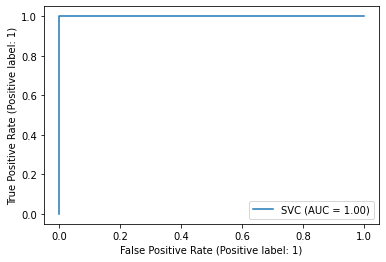

In [45]:
plot_roc_curve(model_svc,test_x,prediction)

In [29]:
model_lR.fit(train_x,train_y)

LogisticRegression(solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


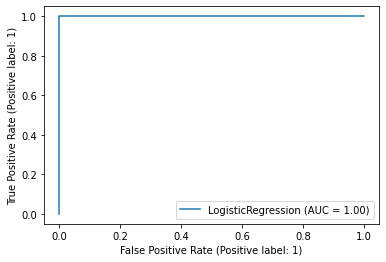

In [30]:
plot_roc_curve(model_lR,test_x,prediction)

In [31]:
model_knn.fit(train_x,train_y)

KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


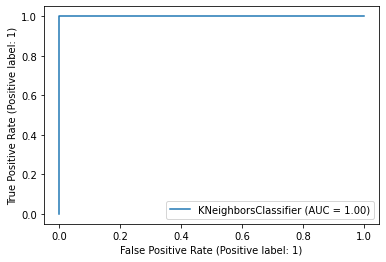

In [32]:
plot_roc_curve(model_knn,test_x,prediction)

In [33]:
model_tree.fit(train_x,train_y)

DecisionTreeClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


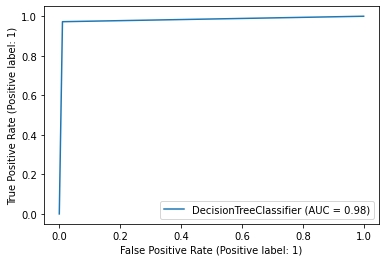

In [34]:
plot_roc_curve(model_tree,test_x,prediction)

WE can still see that svm is has more auc and its predictive capcity is more that the others

**8. MODEL PERFORMANCE BY CONFUSION-MATRIX**

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [36]:
model_svc.fit(train_x,train_y)
pred=model_svc.predict(test_x)

In [37]:
conf=confusion_matrix(test_y,pred)

In [38]:
print(conf)

[[192   0]
 [  0 145]]


In [39]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       145

    accuracy                           1.00       337
   macro avg       1.00      1.00      1.00       337
weighted avg       1.00      1.00      1.00       337

